<a href="https://colab.research.google.com/github/kszymon/neural-network/blob/main/06_cnn%20/01_image_preprocessin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Preprocessing - przygotowanie obrazów

**Augmentacja danych** - technika pozwalająca na zwiększenie zbioru treningowego przez odpowiednie przekształcenia danych wejsciowych. Technika bardzo przydatna zwłaszcza gdy nie mamy wystarczającej ilości danych do wytrenowania sieci. W uczeniu głębokim im więcej posiadamy danych treningowych tym teoretycznie lepiej jesteśmy w stanie wytrenować sieć. Wykorzystamy tą technikę do trenowania problemów związanych z przetwarzaniem obrazu.

Biblioteka Keras dostarcza narzędzia do augmentacji danych, które działają automatycznie podczas trenowania sieci. Możemy to zrobić dzięki klasie **ImageDataGenerator**.

In [5]:
import matplotlib.pyplot as plt
from numpy import expand_dims

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

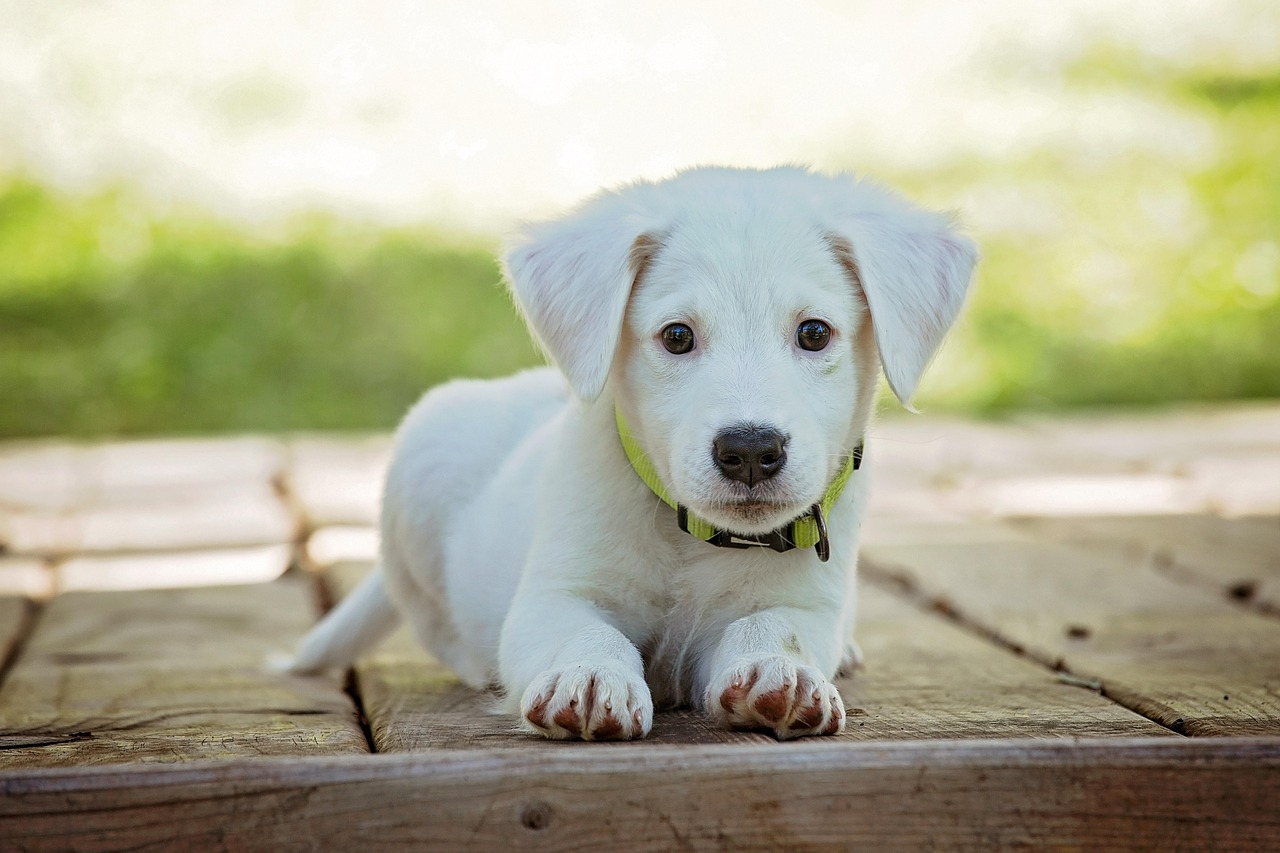

In [6]:
img = load_img('/content/dog.jpeg')
img

In [7]:
data = img_to_array(img)
data.shape

(853, 1280, 3)

In [8]:
data

array([[[238., 237., 219.],
        [240., 239., 221.],
        [240., 239., 221.],
        ...,
        [228., 227., 196.],
        [229., 228., 197.],
        [229., 228., 197.]],

       [[239., 238., 220.],
        [240., 239., 221.],
        [240., 239., 221.],
        ...,
        [228., 227., 196.],
        [228., 227., 196.],
        [227., 226., 195.]],

       [[239., 238., 220.],
        [240., 239., 221.],
        [239., 238., 220.],
        ...,
        [228., 227., 196.],
        [227., 226., 195.],
        [226., 225., 194.]],

       ...,

       [[ 54.,  34.,  27.],
        [ 56.,  36.,  29.],
        [ 58.,  38.,  31.],
        ...,
        [ 52.,  30.,  16.],
        [ 55.,  32.,  18.],
        [ 60.,  34.,  21.]],

       [[ 52.,  32.,  25.],
        [ 54.,  34.,  27.],
        [ 56.,  36.,  29.],
        ...,
        [ 58.,  35.,  21.],
        [ 59.,  33.,  20.],
        [ 62.,  36.,  23.]],

       [[ 51.,  31.,  24.],
        [ 52.,  32.,  25.],
        [ 55.,  

In [9]:
data[:, :, 0]

array([[238., 240., 240., ..., 228., 229., 229.],
       [239., 240., 240., ..., 228., 228., 227.],
       [239., 240., 239., ..., 228., 227., 226.],
       ...,
       [ 54.,  56.,  58., ...,  52.,  55.,  60.],
       [ 52.,  54.,  56., ...,  58.,  59.,  62.],
       [ 51.,  52.,  55., ...,  64.,  64.,  66.]], dtype=float32)

In [10]:
data[:,:, 1]

array([[237., 239., 239., ..., 227., 228., 228.],
       [238., 239., 239., ..., 227., 227., 226.],
       [238., 239., 238., ..., 227., 226., 225.],
       ...,
       [ 34.,  36.,  38., ...,  30.,  32.,  34.],
       [ 32.,  34.,  36., ...,  35.,  33.,  36.],
       [ 31.,  32.,  35., ...,  41.,  38.,  40.]], dtype=float32)

In [11]:
data[:,:, 2]

array([[219., 221., 221., ..., 196., 197., 197.],
       [220., 221., 221., ..., 196., 196., 195.],
       [220., 221., 220., ..., 196., 195., 194.],
       ...,
       [ 27.,  29.,  31., ...,  16.,  18.,  21.],
       [ 25.,  27.,  29., ...,  21.,  20.,  23.],
       [ 24.,  25.,  28., ...,  27.,  25.,  27.]], dtype=float32)

In [12]:
samples = expand_dims(data, 0)
samples

array([[[[238., 237., 219.],
         [240., 239., 221.],
         [240., 239., 221.],
         ...,
         [228., 227., 196.],
         [229., 228., 197.],
         [229., 228., 197.]],

        [[239., 238., 220.],
         [240., 239., 221.],
         [240., 239., 221.],
         ...,
         [228., 227., 196.],
         [228., 227., 196.],
         [227., 226., 195.]],

        [[239., 238., 220.],
         [240., 239., 221.],
         [239., 238., 220.],
         ...,
         [228., 227., 196.],
         [227., 226., 195.],
         [226., 225., 194.]],

        ...,

        [[ 54.,  34.,  27.],
         [ 56.,  36.,  29.],
         [ 58.,  38.,  31.],
         ...,
         [ 52.,  30.,  16.],
         [ 55.,  32.,  18.],
         [ 60.,  34.,  21.]],

        [[ 52.,  32.,  25.],
         [ 54.,  34.,  27.],
         [ 56.,  36.,  29.],
         ...,
         [ 58.,  35.,  21.],
         [ 59.,  33.,  20.],
         [ 62.,  36.,  23.]],

        [[ 51.,  31.,  24.],
       

In [13]:
samples.shape

(1, 853, 1280, 3)

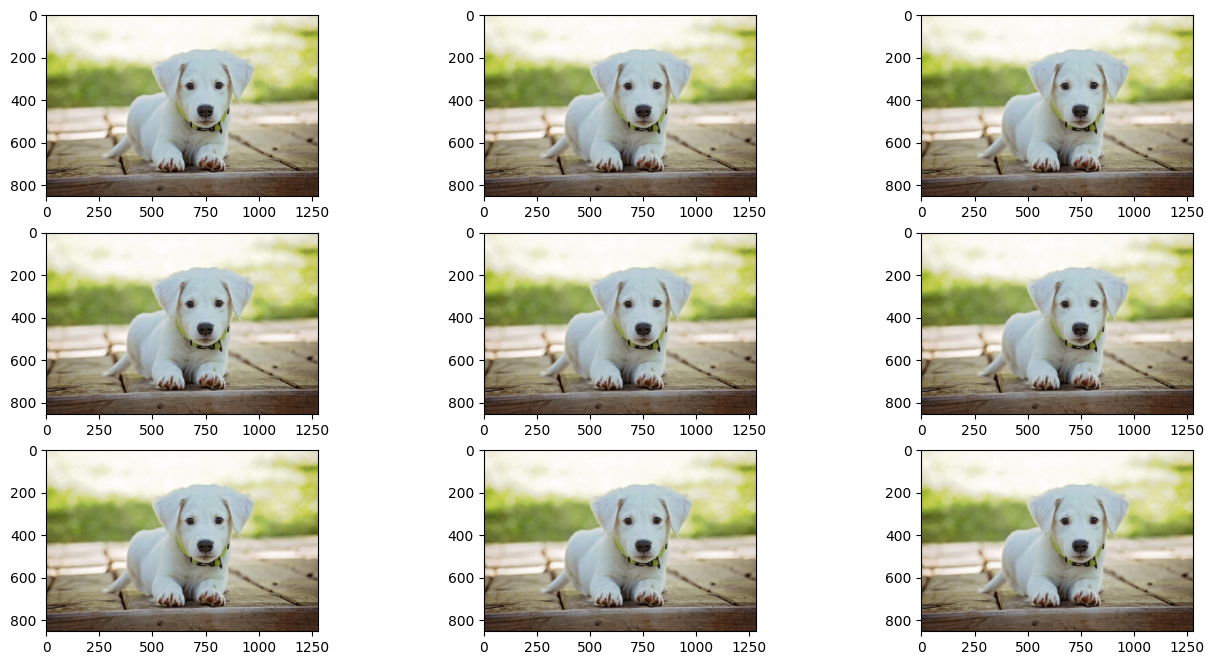

In [15]:
datagen = ImageDataGenerator()

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

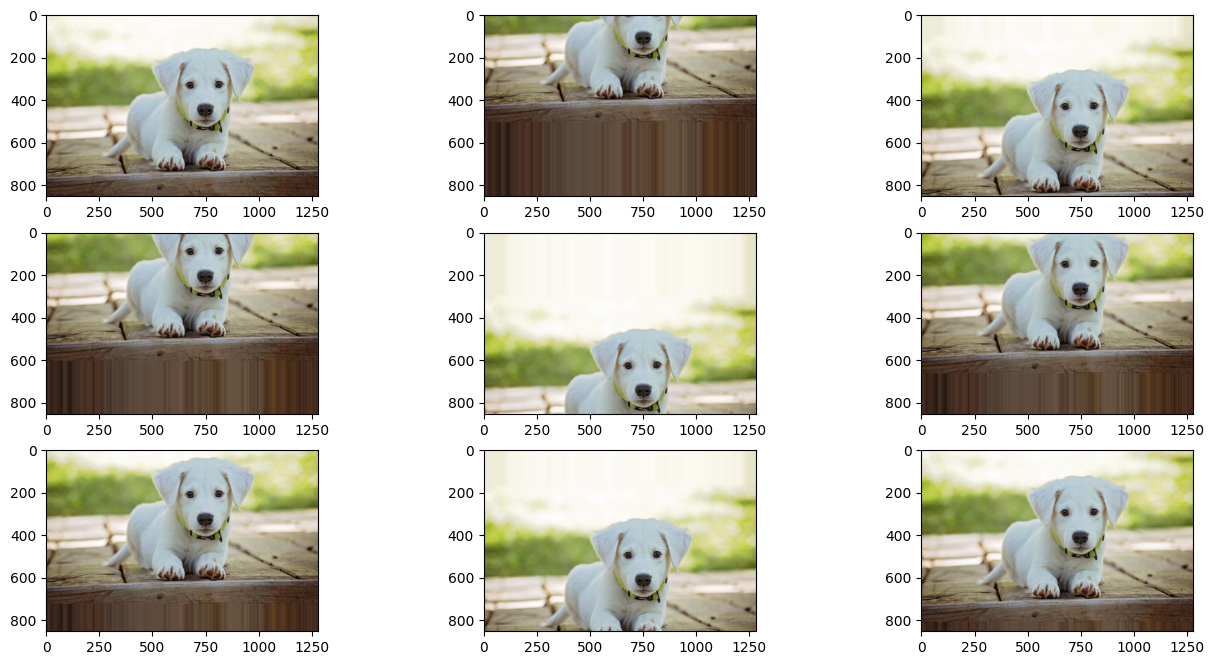

In [18]:
datagen = ImageDataGenerator(width_shift_range=0.3)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

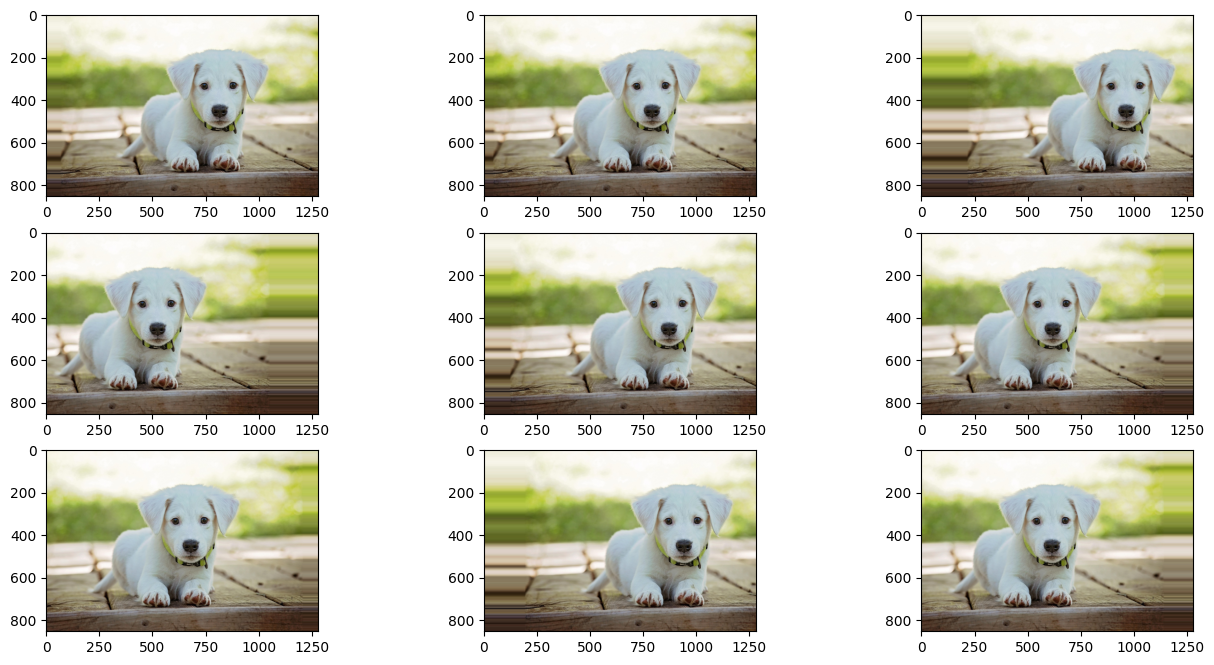

In [19]:
datagen = ImageDataGenerator(height_shift_range=0.3)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

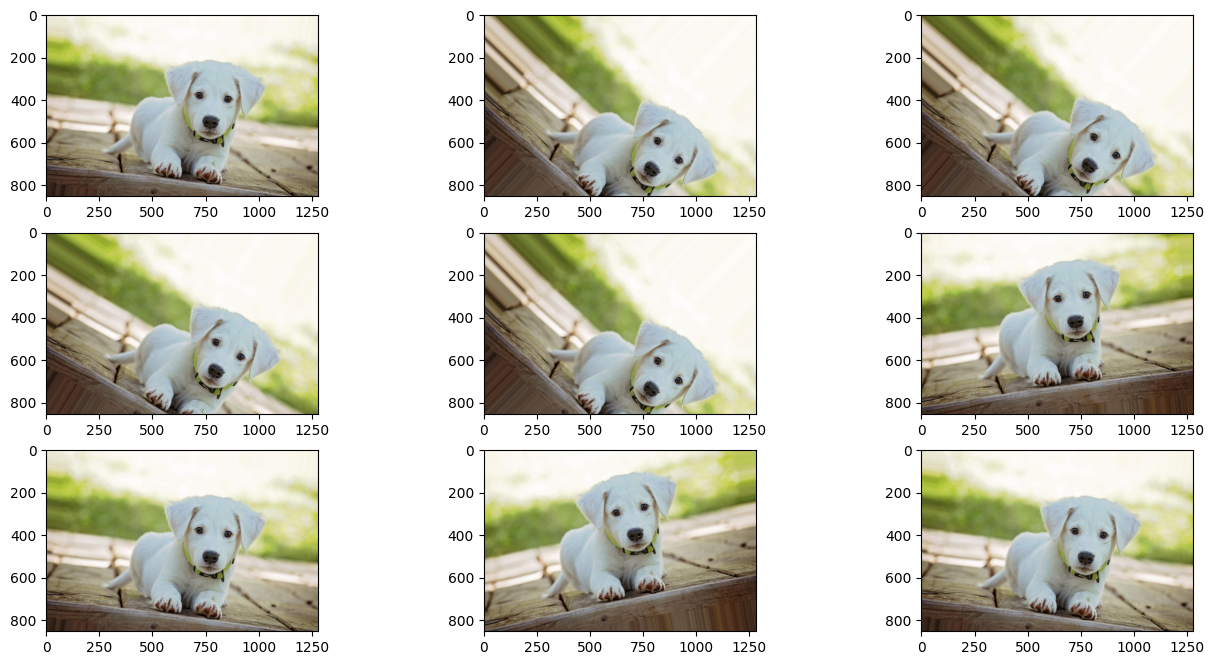

In [21]:
datagen = ImageDataGenerator(rotation_range=45)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

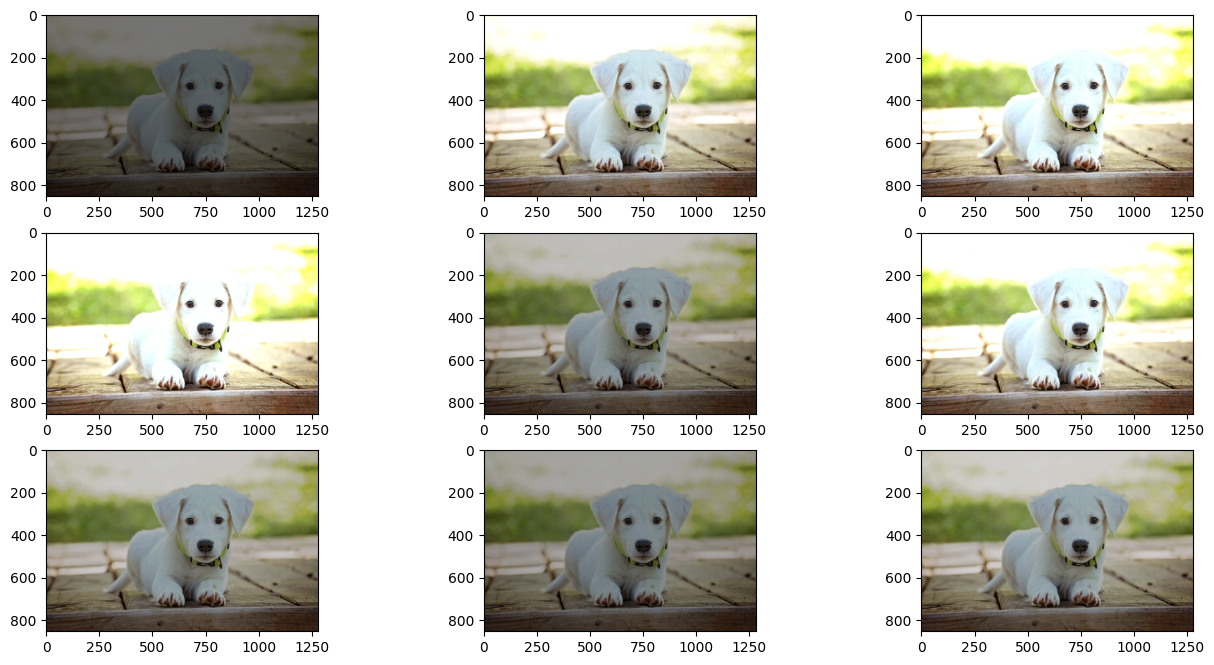

In [23]:
datagen = ImageDataGenerator(brightness_range=[0.4, 1.5])

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

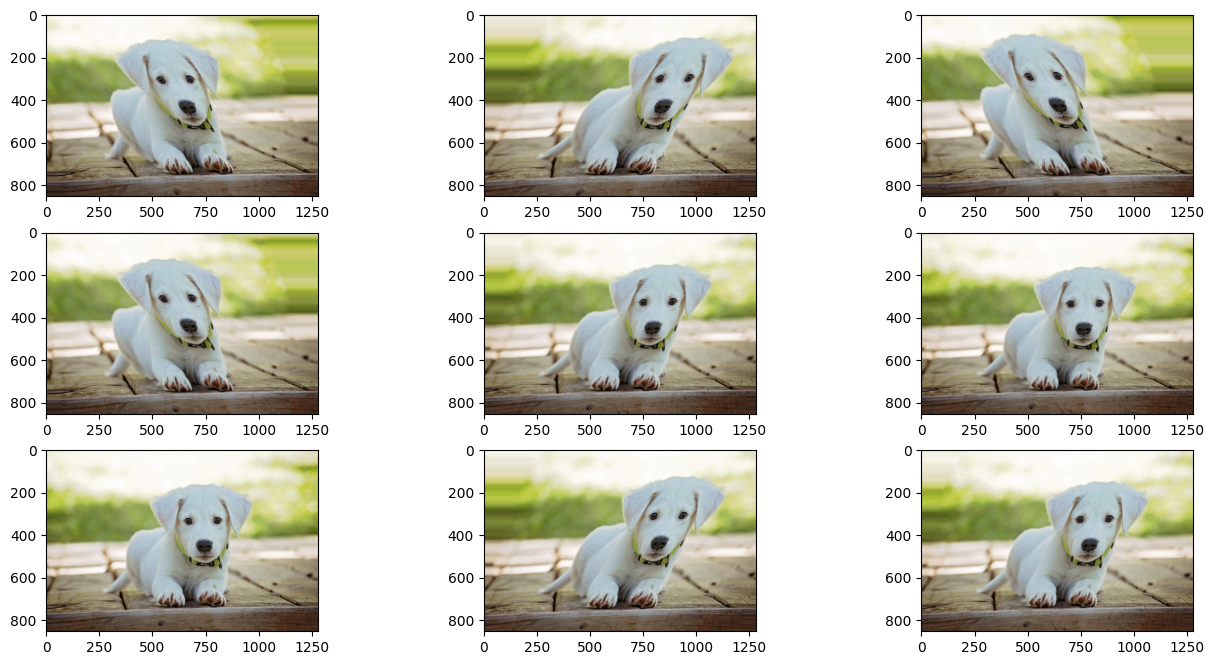

In [24]:
datagen = ImageDataGenerator(shear_range=30)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

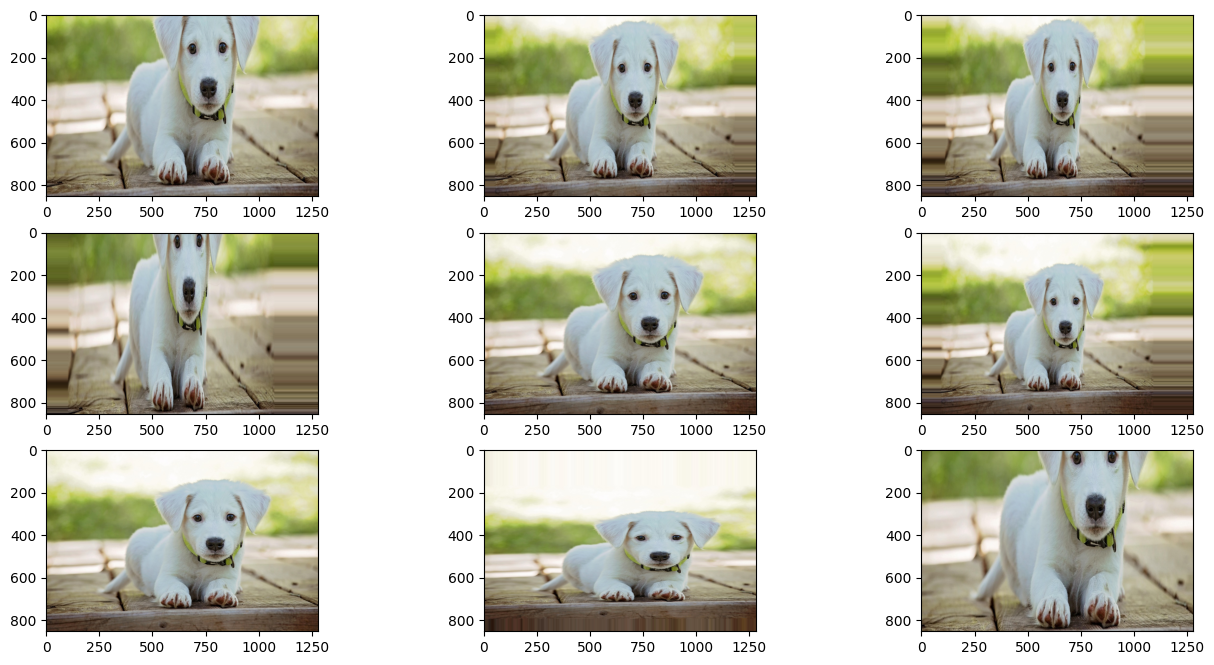

In [28]:
datagen = ImageDataGenerator(zoom_range=0.5)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

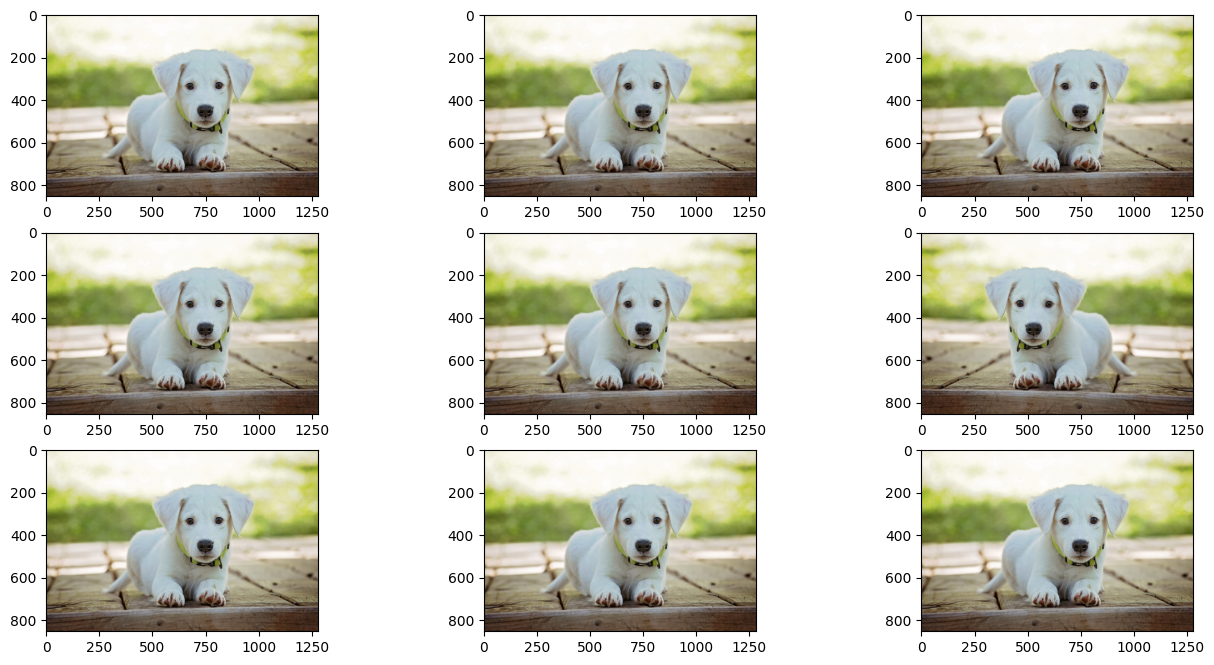

In [31]:
datagen = ImageDataGenerator(horizontal_flip=True)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

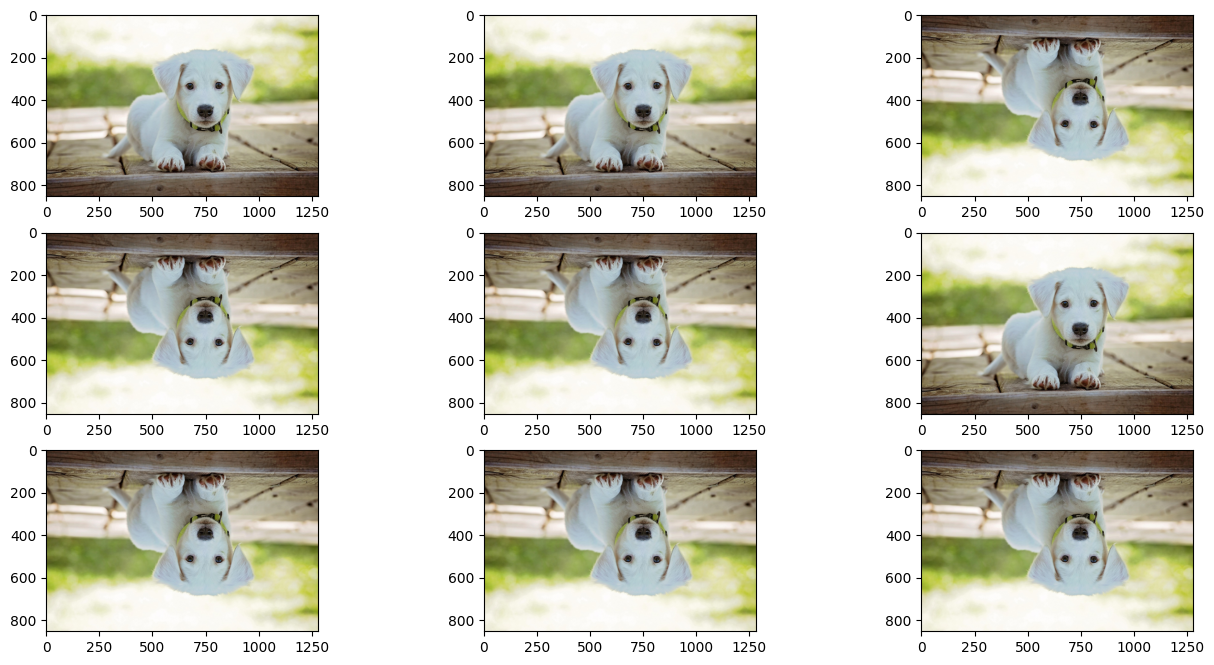

In [33]:
datagen = ImageDataGenerator(vertical_flip=True)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

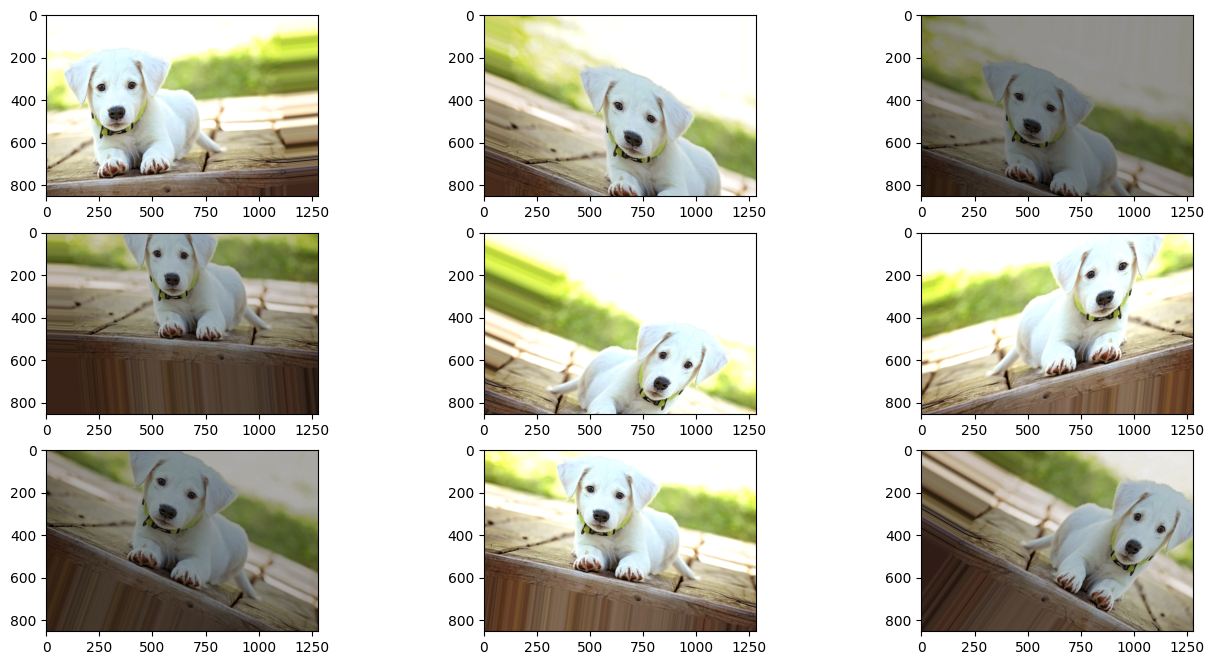

In [34]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=30,
                             brightness_range=[0.4, 1.5],
                             shear_range=20,
                             zoom_range=0.1,
                             horizontal_flip=True)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = next(iterator)
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()